In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('scholarship.csv')

In [3]:
data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


C:\Users\DELL\AppData\Local\Temp\ipykernel_13848\828206924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

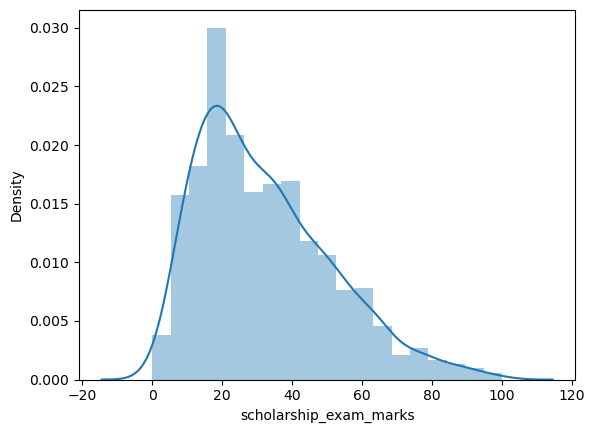

In [4]:
sns.distplot(data["scholarship_exam_marks"])

<Axes: >

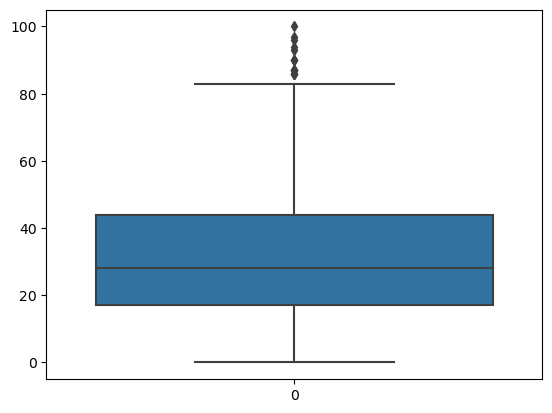

In [5]:
sns.boxplot(data["scholarship_exam_marks"])

In [6]:
Q1=data["scholarship_exam_marks"].quantile(0.25)
Q3=data["scholarship_exam_marks"].quantile(0.75)

In [7]:
Q1

17.0

In [8]:
Q3

44.0

In [9]:
IQR=Q3-Q1

In [10]:
IQR

27.0

In [11]:
data.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [17]:
min=Q1-1.5*IQR
max=Q3+1.5*IQR

In [18]:
min

-23.5

In [19]:
max

84.5

In [20]:
data[(data['scholarship_exam_marks']<min)|(data["scholarship_exam_marks"]>max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


# Trimming

In [23]:
new_data=data[(data["scholarship_exam_marks"]>min)&(data["scholarship_exam_marks"]<max)]

C:\Users\DELL\AppData\Local\Temp\ipykernel_13848\1827204911.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_13848\1827204911.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["scholarship_exam_marks"])


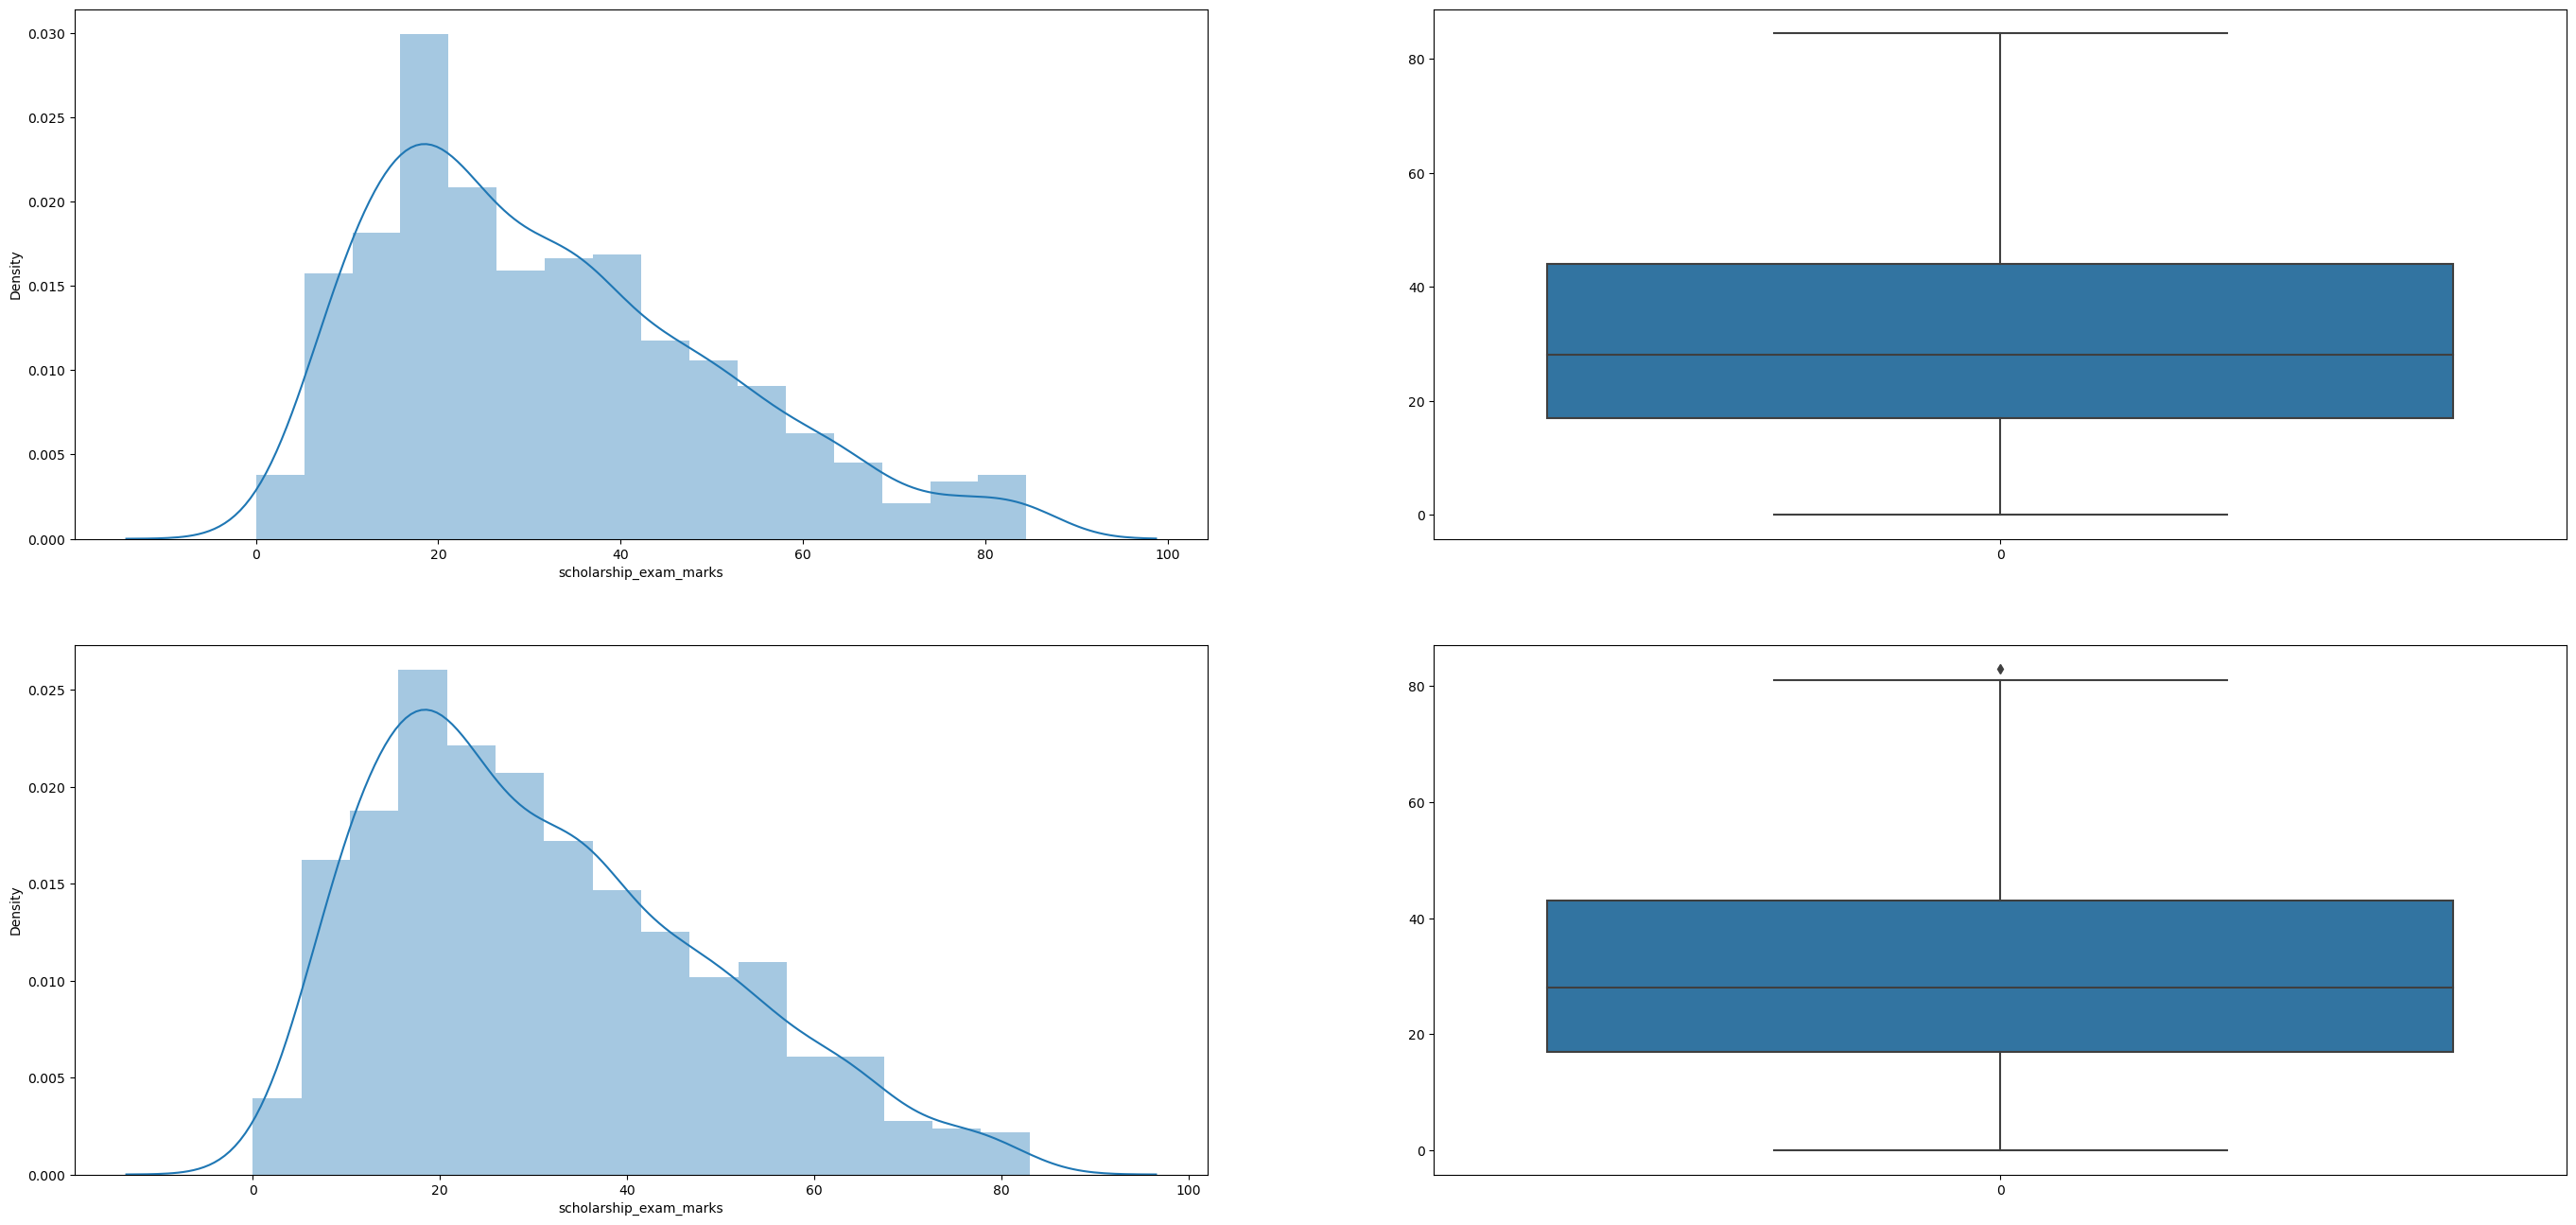

In [32]:
plt.figure(figsize=(34,16))
plt.subplot(2,2,1)
sns.distplot(data["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(data["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.distplot(new_data["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(new_data["scholarship_exam_marks"])

plt.show()

# Capping

In [28]:
data["scholarship_exam_marks"]=np.where(data["scholarship_exam_marks"]>max,max,np.where(data["scholarship_exam_marks"]<min,min,data["scholarship_exam_marks"]))

In [29]:
data.shape

(1000, 3)

<Axes: >

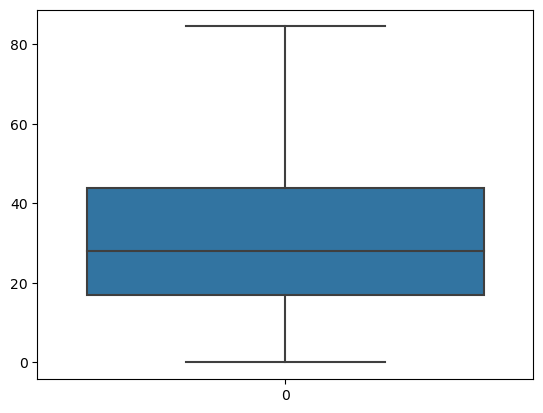

In [31]:
sns.boxplot(data["scholarship_exam_marks"])